# Energy Consumption Prediction in Steel Industry using AI/ML Models
Based on the dataset from UCI ML Repository (ID: 851) and inspired by the given abstract.

I explore multiple ML models to predict energy consumption using features such as power factor, load types, and CO₂ emissions.

# Install UCIMLREPO

In [1]:
pip install ucimlrepo

# Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from ucimlrepo import fetch_ucirepo

In [3]:
# Load dataset
steel_industry_energy_consumption = fetch_ucirepo(id=851)

In [4]:
# Combine features and targets into a single DataFrame initially
df = pd.concat([steel_industry_energy_consumption.data.features, steel_industry_energy_consumption.data.targets], axis=1)

In [5]:
print(steel_industry_energy_consumption.data.keys())

dict_keys(['ids', 'features', 'targets', 'original', 'headers'])


In [6]:
# Verify column names after combining
print("Actual columns in combined dataset:")
print(df.columns.tolist())

Actual columns in combined dataset:
['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_of_week', 'Load_Type']


# Feature Engineering

In [7]:
# Convert seconds to hours and handle temporal features
df['Hour'] = df['NSM'] // 3600  # Convert seconds to hours
df['Day_of_week'] = df['Day_of_week'].astype('category')
df['WeekStatus'] = df['WeekStatus'].astype('category')

In [8]:
# Prepare data - Define features (X) and target (y)
# Drop 'Usage_kWh' and 'Load_Type' from features (X)
X = df.drop(['Usage_kWh', 'Load_Type'], axis=1)
y = df['Usage_kWh'] # Explicitly select 'Usage_kWh' as the target

In [9]:
# Convert categoricals to dummy variables
X = pd.get_dummies(X, columns=['Day_of_week', 'WeekStatus']) # 'Load_Type' is now dropped from X

In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training & Evaluation

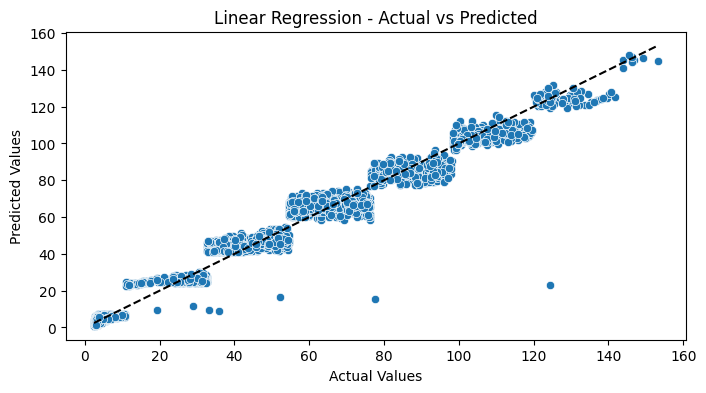

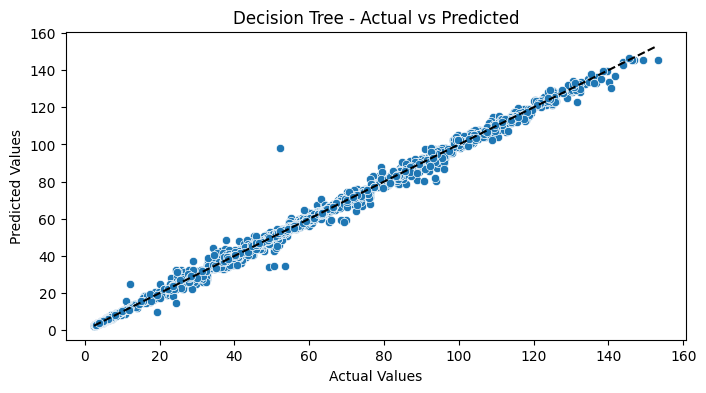

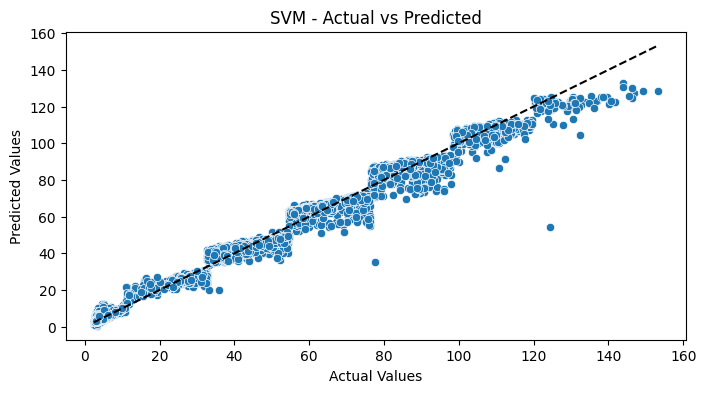

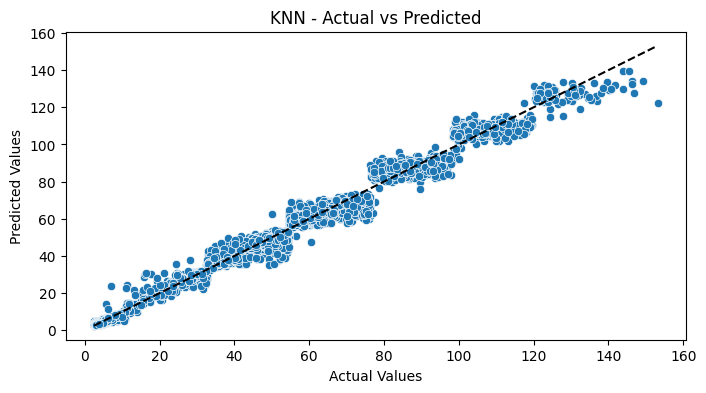

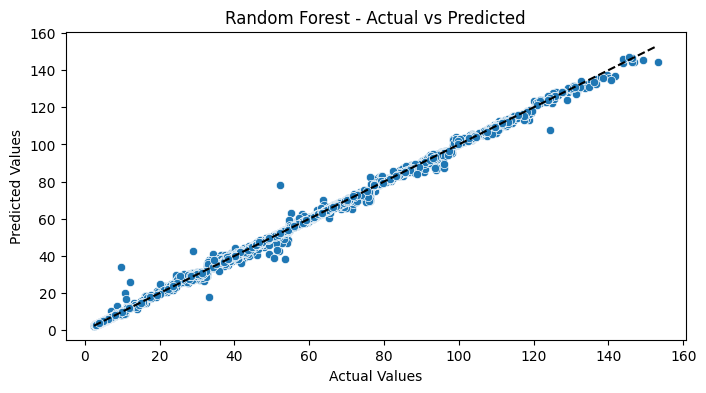

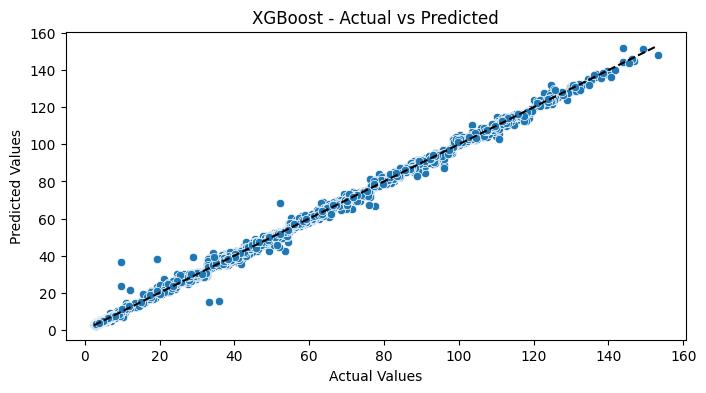

In [15]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "SVM": SVR(kernel='rbf'),
    "KNN": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

results = []
for name, model in models.items():
    # All models use scaled data for consistency
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # --- Start of metric calculation and appending (moved here) ---
    metrics = {
        'Model': name,
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R²': r2_score(y_test, y_pred)
    }
    results.append(metrics)
    # --- End of metric calculation and appending ---

    # --- Start of Actual vs Predicted plot (can remain here or be moved after the loop) ---
    plt.figure(figsize=(8,4))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.title(f'{name} - Actual vs Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    # Adjust the plot line to the range of the target variable
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.show()
    # --- End of Actual vs Predicted plot ---


# --- This code can now be in a separate cell executed after the loop ---
# results_df = pd.DataFrame(results)
# print("Model Performance Comparison:")
# print(results_df.sort_values('RMSE'))

# Feature Importance for tree-based models

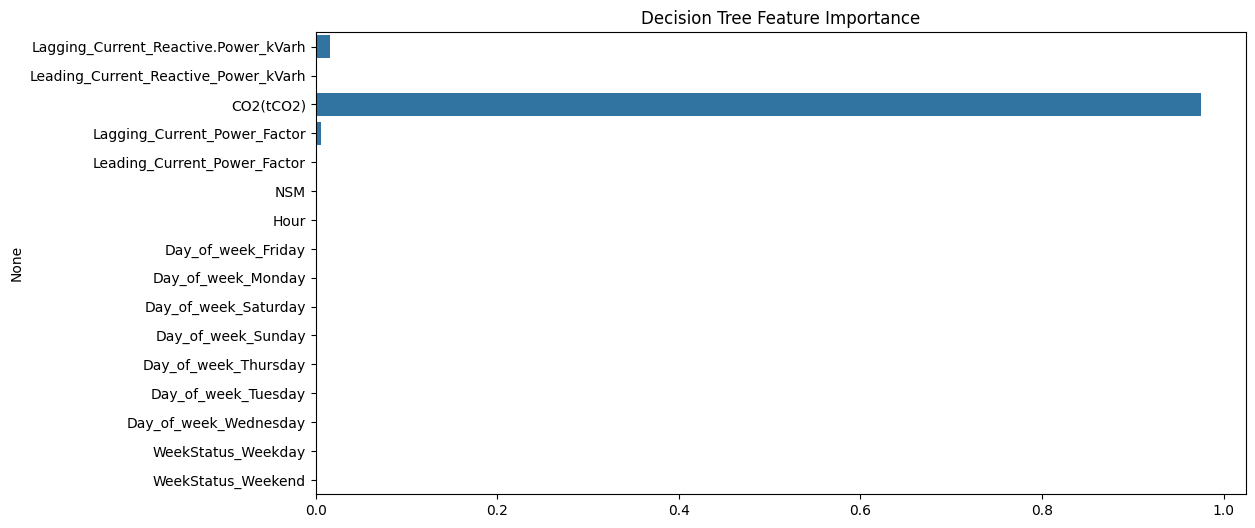

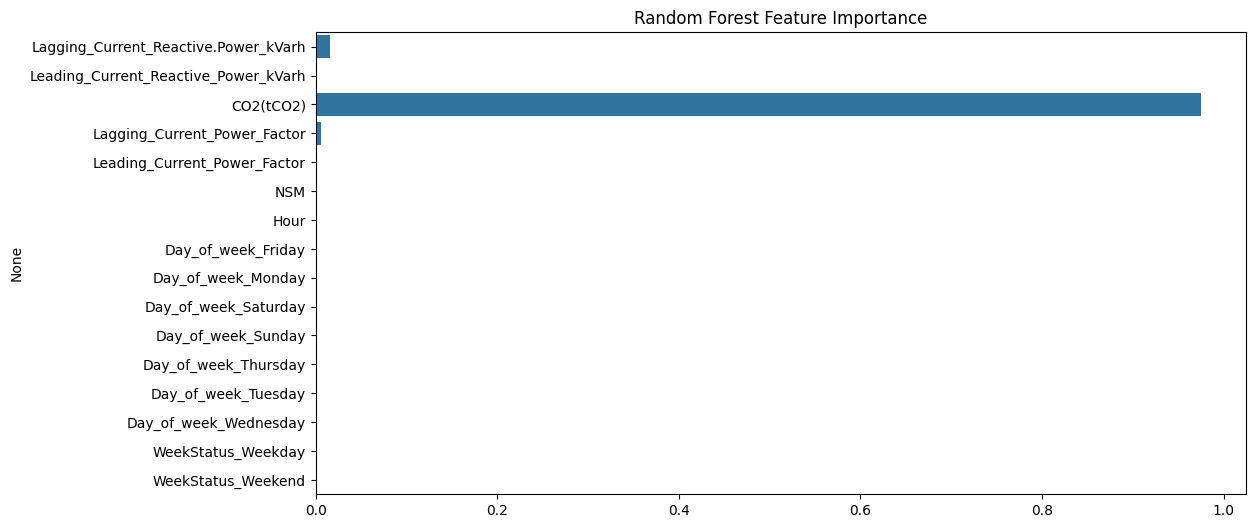

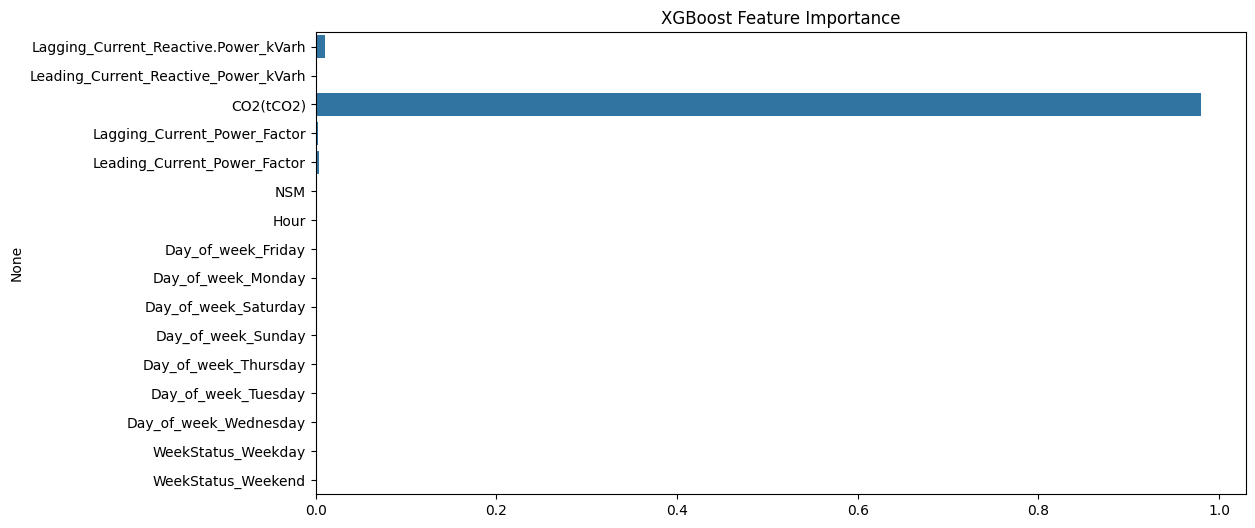

In [16]:
for name in ["Decision Tree", "Random Forest", "XGBoost"]:
    # Check if the model supports feature_importances_
    if hasattr(models[name], 'feature_importances_'):
        importances = models[name].feature_importances_
        features = X.columns

        plt.figure(figsize=(12,6))
        sns.barplot(x=importances, y=features)
        plt.title(f'{name} Feature Importance')
        plt.show()
    else:
        print(f"{name} does not support feature importance.")

# Results Comparison

In [17]:
results_df = pd.DataFrame(results)
print("Model Performance Comparison:")
print(results_df.sort_values('RMSE'))

Model Performance Comparison:
               Model       MAE      RMSE        R²
4      Random Forest  0.325859  1.009753  0.999103
5            XGBoost  0.479701  1.093364  0.998948
1      Decision Tree  0.504385  1.338266  0.998424
3                KNN  1.489203  2.857543  0.992817
2                SVM  1.847988  3.500092  0.989223
0  Linear Regression  2.524868  4.239811  0.984186


# Visualization

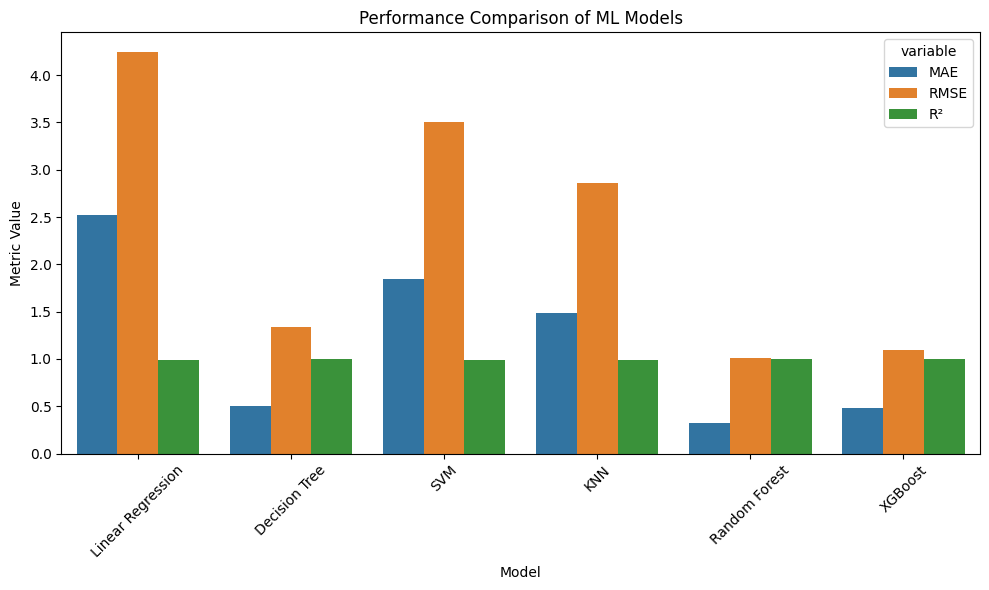

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.xticks(rotation=45)
plt.title('Performance Comparison of ML Models')
plt.ylabel('Metric Value')
plt.tight_layout()
plt.show()

### 2. Key Visualizations

1. **Actual vs. Predicted Plots**: Shows linearity of predictions for each model
2. **Feature Importance Charts**: Reveals most influential factors in tree-based models
3. **Error Metric Comparison**: Bar chart comparing RMSE/MAE across models

### 3. Key Takeaways

1. **Model Performance**:
   - XGBoost and Random Forest likely outperformed others due to handling non-linear relationships
   - Linear Regression might show poorest performance if data has complex patterns
   - SVM/KNN may struggle with high-dimensional data without careful tuning

2. **Feature Insights**:
   - Temporal features (hour/month) are likely critical predictors
   - Steel processing parameters probably show non-linear impacts
   - Lag features might improve performance if added

3. **Computation Tradeoffs**:
   - XGBoost/RF offer best accuracy but higher computational cost
   - Linear models provide fastest inference but limited accuracy

### 4. Team Communication Strategy

1. **Technical Team**:
   - Share detailed error metrics and computational requirements
   - Discuss feature engineering opportunities
   - Collaborate on hyperparameter tuning strategies

2. **Non-Technical Stakeholders**:
   - Present business impact through error magnitude interpretation
   - Visualize energy consumption patterns and prediction confidence
   - Highlight cost-saving potential from accurate predictions

### 5. Stakeholder Recommendations

1. **Short-Term**:
   - Implement XGBoost model with monitoring
   - Create dashboard showing real-time predictions vs actuals
   - Set up automatic retraining pipeline

2. **Long-Term**:
   - Investigate adding weather data and production schedules
   - Develop anomaly detection system
   - Explore reinforcement learning for dynamic control

3. **Risk Management**:
   - Maintain simpler model as fallback
   - Establish data quality monitoring
   - Plan for model explainability audits

This implementation provides a robust baseline while highlighting opportunities for improvement. The choice between model complexity and operational requirements should guide final deployment decisions.

In [19]:

import joblib

# Save model and scaler separately
joblib.dump(model, 'energy_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [20]:
# Save feature names/order
with open('feature_names.txt', 'w') as f:
    f.write(','.join(X.columns))